<a href="https://colab.research.google.com/github/arko-sys/XAI-ML-Court/blob/main/machine_learning_court_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/main/assignments/machine_learning_court.ipynb)

# 👩‍⚖️ ⚖️ Machine Learning Court

This notebook provides base model training code for our three case scenarios:
1. **Loan Approval**
2. **Breast Cancer Misclassification**
3. **Recidivism Prediction**

> ⚠️ This notebook does **not** include XAI techniques (SHAP, LIME, Anchors). You are expected to implement those yourself based on the model and prediction tasks below.





## ⚖️ Case 1: Loan Denial Dispute – UCI Adult Income Dataset
#### 🔍 Scenario

Jane Dow, a 37-year-old professional woman with a Bachelor's degree and full-time executive role, applied for a premium credit product. The bank’s model—trained to predict income level as a proxy for eligibility—classified her as earning ≤$50K, resulting in denial. She disputes the fairness of the decision.

#### 🟥 Prosecution
Evaluate whether the model’s decision may have been influenced by inappropriate or unfair reasoning. Explore whether the explanation aligns with what should be expected in a fair credit decision.

#### 🟦 Defense
Justify the decision based on the model’s learned patterns. Consider how well the explanation supports the classification and whether similar profiles are treated consistently.

In [ ]:
# 📦 Case 1: Loan Approval Prediction (Adult Income Dataset)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load Data
from sklearn.datasets import fetch_openml

adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

# Clean and preprocess
df = df.dropna()
df = df.copy()
encoders = {}
label_cols = df.select_dtypes(include="category").columns.tolist()

for col in label_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop(["class", "fnlwgt"], axis=1)
y = df["class"].apply(lambda x: 1 if x == ">50K" else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train simple RF model
model_adult = RandomForestClassifier(random_state=42)
model_adult.fit(X_train, y_train)
print(classification_report(y_test, model_adult.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9045

    accuracy                           1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



In [ ]:
# 🎯 Focus Instance: Loan Rejection Case (Jane Dow)

jane_encoded = {
    "age": 37,
    "workclass": encoders["workclass"].transform(["Private"])[0],
    "education": encoders["education"].transform(["Bachelors"])[0],
    "marital-status": encoders["marital-status"].transform(["Never-married"])[0],
    "occupation": encoders["occupation"].transform(["Exec-managerial"])[0],
    "relationship": encoders["relationship"].transform(["Not-in-family"])[0],
    "race": encoders["race"].transform(["White"])[0],
    "sex": encoders["sex"].transform(["Female"])[0],
    "hours-per-week": 50,
    "native-country": encoders["native-country"].transform(["United-States"])[0],
    "capital-gain": 0,
    "capital-loss": 0,
    "education-num": 13,
}

jane_df = pd.DataFrame([jane_encoded])
jane_df = jane_df[X_train.columns]
pred = model_adult.predict(jane_df)
print(
    "Prediction for Jane Dow (Loan Eligibility):",
    "Approved" if pred[0] == 1 else "Denied",
)

Prediction for Jane Dow (Loan Eligibility): Denied


## 🩺 Case 2: Tumor Misclassification – Breast Cancer Dataset
#### 🔍 Scenario
Patient X received a benign classification from an AI tumor diagnostic tool and was not referred for a biopsy. Months later, the tumor was diagnosed as malignant. The model’s output is now under scrutiny.

#### 🟥 Prosecution
Use explanation tools to evaluate how the model arrived at this decision. Consider whether any key medical indicators might have been overlooked or minimized.

#### 🟦 Defense
Defend the decision with reference to the model’s logic and learned feature importance. Consider how this decision aligns with the broader data trends.

In [ ]:
# 🧬 Case 2: Tumor Misclassification (Breast Cancer Dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load dataset
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc["target"] = data.target  # 0 = malignant, 1 = benign

# Train/test split
X = df_bc.drop("target", axis=1)
y = df_bc["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model_bc = RandomForestClassifier(random_state=42)
model_bc.fit(X_train, y_train)
print(classification_report(y_test, model_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# 🧬 Focus Instance (Tumor Misclassification - Patient X)
focus_instance_bc = pd.DataFrame(
    [
        {
            "mean radius": 13.80,
            "mean texture": 15.79,
            "mean perimeter": 90.43,
            "mean area": 584.1,
            "mean smoothness": 0.1007,
            "mean compactness": 0.1280,
            "mean concavity": 0.07789,
            "mean concave points": 0.05069,
            "mean symmetry": 0.1662,
            "mean fractal dimension": 0.06566,
            "radius error": 0.4101,
            "texture error": 1.074,
            "perimeter error": 2.635,
            "area error": 40.14,
            "smoothness error": 0.00541,
            "compactness error": 0.02204,
            "concavity error": 0.01664,
            "concave points error": 0.01185,
            "symmetry error": 0.02095,
            "fractal dimension error": 0.004902,
            "worst radius": 16.57,
            "worst texture": 20.86,
            "worst perimeter": 110.3,
            "worst area": 812.4,
            "worst smoothness": 0.1411,
            "worst compactness": 0.3542,
            "worst concavity": 0.2779,
            "worst concave points": 0.1383,
            "worst symmetry": 0.2589,
            "worst fractal dimension": 0.1030,
        }
    ]
)

# Run prediction
pred = model_bc.predict(focus_instance_bc)
print(
    "Prediction for Patient X:",
    "Benign → No Biopsy" if pred[0] == 1 else "Malignant → Action Needed",
)

Prediction for Patient X: Benign → No Biopsy


## ⚖️ Case 3: Recidivism Risk – COMPAS Dataset
#### 🔍 Scenario
Malik Johnson, a 27-year-old with one prior felony, was flagged as low risk by an AI risk assessment tool and granted parole. Some community stakeholders have questioned whether this was an appropriate classification.

#### 🟥 Prosecution
Examine whether the model may have underestimated risk factors. Use explanation techniques to uncover potential oversights or inconsistencies.

#### 🟦 Defense
Argue that the decision was reasonable based on the model's criteria. Use explanation tools to show which features were most influential and whether the classification aligns with data-driven patterns.

In [ ]:
# ⚖️ Case 3: Recidivism Prediction (COMPAS Dataset)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
df_compas = pd.read_csv(url)

# Filter relevant columns and preprocess
features = [
    "age",
    "sex",
    "race",
    "priors_count",
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "c_charge_degree",
]
df = df_compas[features + ["two_year_recid"]].dropna()
df = df[df["c_charge_degree"].isin(["F", "M"])]  # Filter valid degrees

# Encode categoricals
df = df.copy()
df["sex"] = df["sex"].astype("category").cat.codes
df["race"] = df["race"].astype("category").cat.codes
df["c_charge_degree"] = df["c_charge_degree"].astype("category").cat.codes

X = df[features]
y = df["two_year_recid"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_compas = RandomForestClassifier(random_state=42)
model_compas.fit(X_train, y_train)
print(classification_report(y_test, model_compas.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       823
           1       0.57      0.57      0.57       620

    accuracy                           0.63      1443
   macro avg       0.62      0.62      0.62      1443
weighted avg       0.63      0.63      0.63      1443



In [ ]:
df["sex"].value_counts()

,count
sex,
1,5819
0,1395


In [ ]:
# 🎯 Focus Instance: Recidivism Risk Case (Malik Johnson)
focus_instance_compas = pd.DataFrame(
    [
        {
            "age": 27,
            "sex": 1,  # Male
            "race": 1,  # African-American
            "priors_count": 1,
            "juv_fel_count": 0,
            "juv_misd_count": 0,
            "juv_other_count": 0,
            "c_charge_degree": 1,  # Felony
        }
    ]
)

pred = model_compas.predict(focus_instance_compas)
print("Prediction for Malik Johnson (Recidivism):", pred)

Prediction for Malik Johnson (Recidivism): [0]


#### SHAP

In [ ]:
import shap
import matplotlib.pyplot as plt

background = X_train.sample(500, random_state=42)
explainer = shap.TreeExplainer(model_compas, data=X_train)

In [ ]:
X_sample = X_test.sample(300, random_state=42)

shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    sv_class1 = shap_values[1]  # class 1 = "recidivism"
else:

    sv_class1 = shap_values[:, :, 1]  # shape: (300, 8)

print("SHAP values shape:", sv_class1.shape)
print("X_sample shape:", X_sample.shape)

 97%|=================== | 583/600 [00:45<00:01]       

SHAP values shape: (300, 8)
X_sample shape: (300, 8)


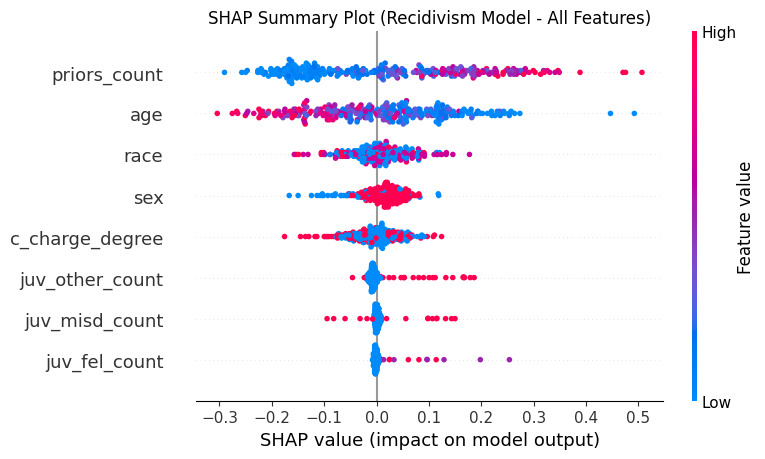

In [ ]:
shap.summary_plot(sv_class1, X_sample, show=False, max_display=X_sample.shape[1])
plt.title("SHAP Summary Plot (Recidivism Model - All Features)")
plt.tight_layout()
plt.show()


SHAP contribution for focus instance (class 1 probability):
priors_count      -0.154497
c_charge_degree   -0.078268
race              -0.051789
age               -0.019837
juv_other_count   -0.014189
sex                0.012275
juv_fel_count     -0.005968
juv_misd_count    -0.001270
dtype: float64


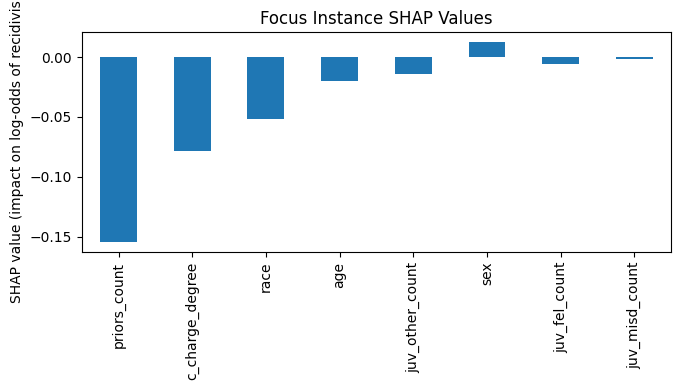

In [ ]:
focus_shap = explainer.shap_values(focus_instance_compas)

focus_sv_class1 = focus_shap[0, :, 1]

impact_series = pd.Series(
    focus_sv_class1, index=focus_instance_compas.columns
).sort_values(key=lambda s: s.abs(), ascending=False)

print("\nSHAP contribution for focus instance (class 1 probability):")
print(impact_series)

plt.figure(figsize=(7, 4))
impact_series.plot(kind="bar")
plt.ylabel("SHAP value (impact on log-odds of recidivism)")
plt.title("Focus Instance SHAP Values")
plt.tight_layout()
plt.show()

For Malik Johnson’s case, the SHAP results show that priors count is the strongest factor driving the prediction, contributing negatively and substantially to the model’s estimate of recidivism risk. This means Malik’s lack of prior offenses serves as a strong protective factor, pulling the prediction downward and signaling reduced risk.

The charge degree and race features also contribute negatively, further lowering the estimated risk, though their effects are smaller than priors count. Age has a slight negative impact in this case, reducing risk rather than elevating it, which differs from the global trend. Other features such as juvenile counts and sex contribute very little in comparison and are essentially negligible for this specific prediction.

Looking at the model more broadly, the global SHAP summary indicates that priors count and age are the dominant drivers of recidivism predictions across the dataset. Individuals with more prior offenses are consistently assessed at higher risk, while younger individuals are generally associated with greater likelihood of recidivism compared to older ones. Demographic variables and juvenile offense counts play a smaller role overall. In short, SHAP highlights that for Malik, low priors and charge degree reduce risk, while globally, priors and age shape most of the model’s decision-making.


#### LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=abe3c9e1372e969c96aeb2392cb59aa338e2f9cffe561b709ffac8b4e1c4bcb1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=["No Recidivism", "Recidivism"],
    mode="classification",
    discretize_continuous=True,
)

In [ ]:
focus_instance_values = focus_instance_compas.values[0]
explanation = explainer_lime.explain_instance(
    focus_instance_values, model_compas.predict_proba, num_features=len(X_train.columns)
)

print("LIME Explanation for Malik Johnson (Recidivism Prediction):")
for feature, contribution in explanation.as_list():
    print(f"{feature}: {contribution:.4f}")

LIME Explanation for Malik Johnson (Recidivism Prediction):
0.00 < priors_count <= 2.00: -0.1161
juv_fel_count <= 0.00: -0.1134
juv_misd_count <= 0.00: -0.0830
juv_other_count <= 0.00: -0.0680
25.00 < age <= 31.00: 0.0436
0.00 < c_charge_degree <= 1.00: -0.0354
0.00 < race <= 2.00: 0.0039
sex <= 1.00: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


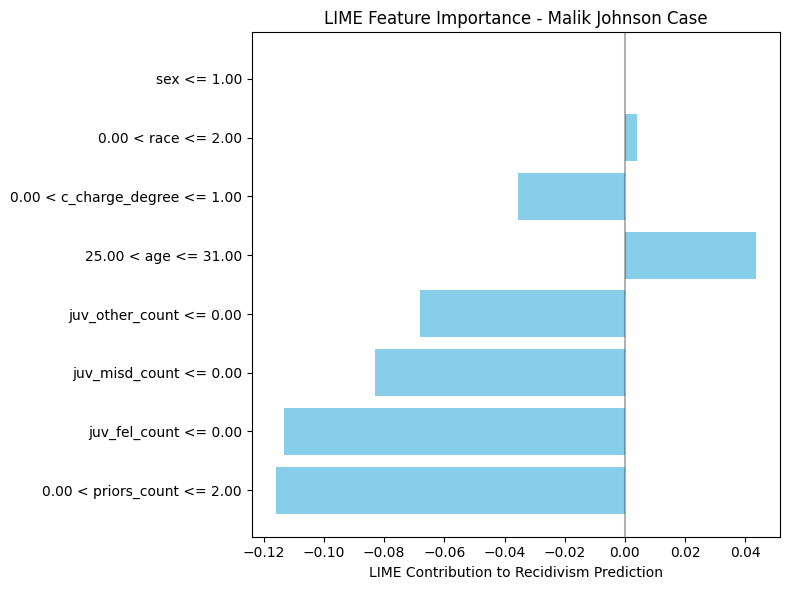

In [ ]:
lime_values = explanation.as_list()
features = [item[0] for item in lime_values]
contributions = [item[1] for item in lime_values]

sorted_indices = sorted(
    range(len(contributions)), key=lambda i: abs(contributions[i]), reverse=True
)
sorted_features = [features[i] for i in sorted_indices]
sorted_contributions = [contributions[i] for i in sorted_indices]

plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_contributions, color="skyblue")
plt.xlabel("LIME Contribution to Recidivism Prediction")
plt.title("LIME Feature Importance - Malik Johnson Case")
plt.axvline(x=0, color="black", linestyle="-", alpha=0.3)
plt.tight_layout()
plt.show()

For Malik Johnson, the LIME explanation shows that the primary factors reducing his predicted risk of recidivism are the absence of juvenile felonies, misdemeanors, and other juvenile offenses, along with having two or fewer prior adult offenses. These features strongly push the prediction toward a lower-risk outcome.

In contrast, certain characteristics provide a slight upward pull on the risk estimate, particularly being in the 25–31 age range and, to a much smaller extent, his race category and charge degree. The variable sex has almost no effect on the prediction. Taken together, LIME suggests that Malik’s limited criminal history is the decisive influence in the model’s local reasoning, outweighing the modest contributions from demographic and charge-related attributes.

### Case defending the original model's decision

In defense of the original model’s decision to mark Malik as low risk, it is important to emphasize that his clean juvenile record, limited prior offenses, and charge-related factors provide far stronger evidence about his future behavior than demographic characteristics such as age or sex. The SHAP results for Malik’s case confirm that priors count was the dominant protective factor, with charge degree and race also lowering his estimated risk. By contrast, age and sex contributed only slightly and were essentially negligible in shaping his individual prediction.

While global SHAP analysis highlights age as an important driver in the model overall, age is not logically a binding determinant of recidivism. Young adults do not inherently reoffend at higher rates; rather, patterns of future criminal behavior are more consistently explained by prior criminal activity and charge history than by demographic attributes. Similarly, sex should not be treated as a determinant variable, since biological or demographic categories cannot, on their own, account for individual behavioral outcomes.

From a human rights perspective, relying too heavily on attributes like age, sex, or race risks reinforcing systemic biases, and may conflict with principles of fairness and equal protection under the law. Courts in the United States have acknowledged these concerns. For instance, in *State v. Loomis* (2016), the Wisconsin Supreme Court noted that risk assessment tools must not use protected characteristics such as gender to make sentencing decisions, as doing so could create unconstitutional disparate impacts. More broadly, the U.S. Supreme Court has established in Equal Protection Clause jurisprudence (e.g., *Craig v. Boren*, 1976) that classifications based on sex are subject to heightened scrutiny, while race-based classifications face strict scrutiny (*Loving v. Virginia*, 1967). These precedents underscore the principle that individual liberty cannot be curtailed on the basis of broad demographic categories.

Therefore, the model’s emphasis on Malik’s actual criminal history—or more accurately, the absence of it—along with charge-related factors demonstrates a sound and fairer approach. By weighting behavioral history more heavily than demographic variables, the model aligns with both logical predictive reasoning and established human rights principles. In Malik’s case, this explains why the system appropriately and fairly classified him as low risk, even though age is a globally important feature in the dataset.
